<a href="https://colab.research.google.com/github/verneh/yolo/blob/main/easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 15 kB/s 
     |████████████████████████████████| 47.6 MB 1.2 MB/s 


In [2]:
# list them
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Jun 29 13:44 sample_data


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


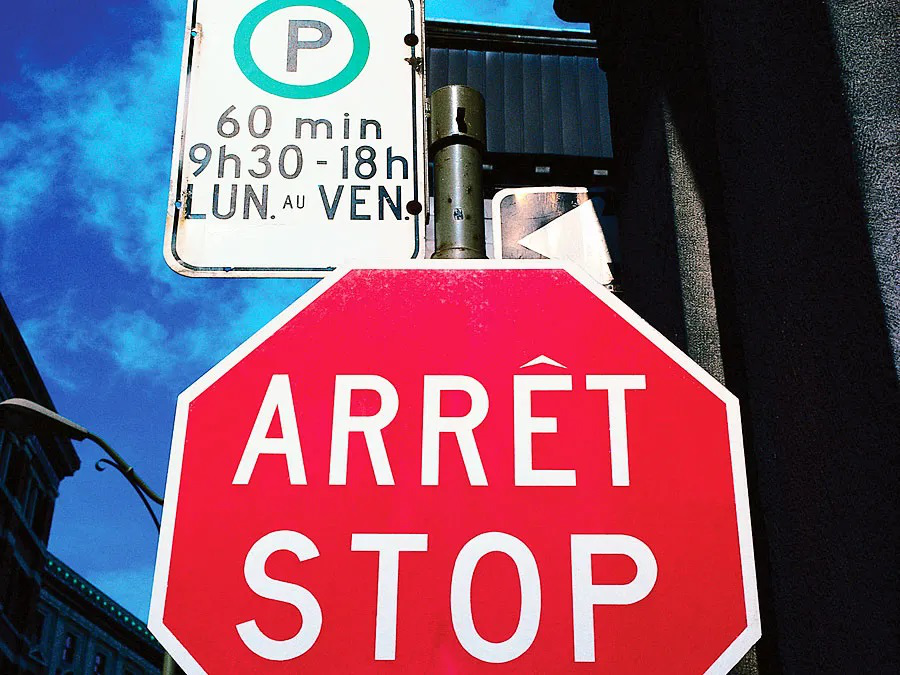

In [4]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("quebec.jpg")
im

In [5]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['fr','en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [6]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext('quebec.jpg')
bounds

[([[277, 9], [339, 9], [339, 81], [277, 81]], 'P', 0.9781355458361674),
 ([[213, 99], [279, 99], [279, 143], [213, 143]], '60', 0.998797677928107),
 ([[293, 107], [387, 107], [387, 145], [293, 145]], 'min', 0.9918948413473243),
 ([[184, 136], [414, 136], [414, 186], [184, 186]],
  '9h30 - 18h',
  0.721094533756144),
 ([[178, 178], [280, 178], [280, 226], [178, 226]], 'LUN', 0.9953615028619022),
 ([[278, 190], [310, 190], [310, 214], [278, 214]], 'AU', 0.8065563187745431),
 ([[314, 178], [426, 178], [426, 226], [314, 226]],
  'VENY',
  0.4739852249622345),
 ([[230, 350], [667, 350], [667, 503], [230, 503]],
  'ARRÊT',
  0.9117599834673576),
 ([[231, 515], [673, 515], [673, 675], [231, 675]],
  'STOP',
  0.9977665543556213)]

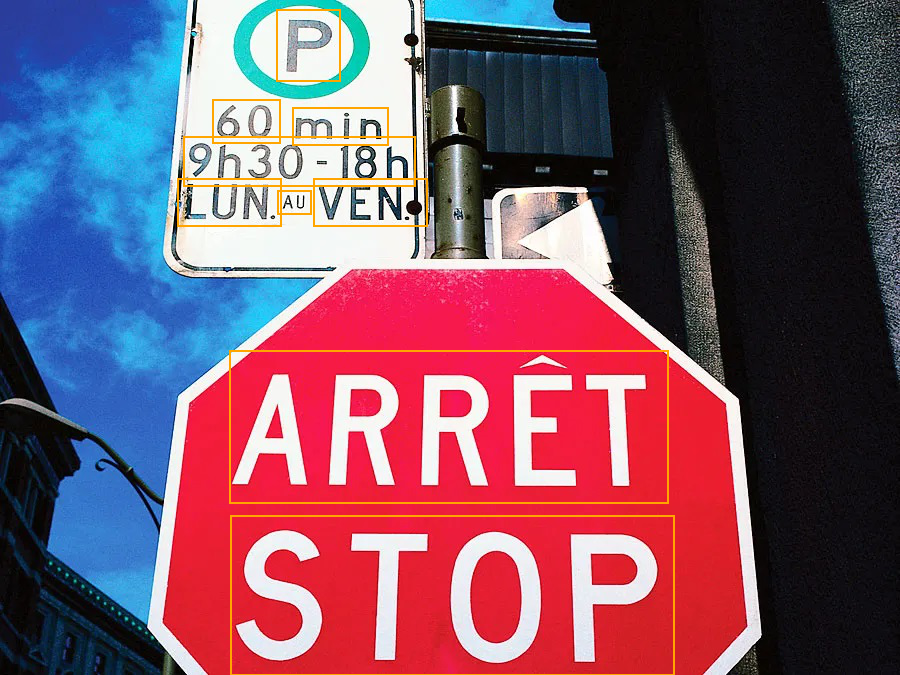

In [7]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='orange', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)